## Simple linear regression

In [1]:
# import pandas as pd
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# %config Inlinebackend.figure_format = 'retina'

import pyforest

In [2]:
url = 'https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv'
df = pd.read_csv(url, parse_dates=['date'])
df.head()

<IPython.core.display.Javascript object>

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.01089,0.47526,0.84970,0.90626,0.94622
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.11695,-0.18056,0.02742,0.05883,0.08103
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.48516,0.82320,1.28595,1.35584,1.40524
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.08714,-0.20243,0.00000,0.03058,0.05218
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.24443,-0.08704,0.14468,0.17968,0.20441


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           757 non-null    datetime64[ns]
 1   iso_a3         757 non-null    object        
 2   currency_code  757 non-null    object        
 3   name           757 non-null    object        
 4   local_price    757 non-null    float64       
 5   dollar_ex      757 non-null    float64       
 6   dollar_price   757 non-null    float64       
 7   GDP_dollar     757 non-null    float64       
 8   adj_price      757 non-null    float64       
 9   USD            757 non-null    float64       
 10  EUR            757 non-null    float64       
 11  GBP            757 non-null    float64       
 12  JPY            757 non-null    float64       
 13  CNY            757 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 82.9+ KB


In [4]:
df = df[(df['date'].dt.year == 2021) & (df['date'].dt.month == 1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
702,2021-01-01,ARG,ARS,Argentina,320.00,85.373600,3.748231,9890.314,3.263744,0.11556,-0.00950,0.18393,0.37871,0.08880
703,2021-01-01,AUS,AUD,Australia,6.48,1.299968,4.984740,54348.227,5.057862,-0.04267,-0.15000,0.01599,0.18315,-0.06564
704,2021-01-01,AZE,AZN,Azerbaijan,3.95,1.699000,2.324897,4813.670,3.058874,-0.26171,-0.34448,-0.21647,-0.08756,-0.27942
705,2021-01-01,BHR,BHD,Bahrain,1.50,0.377000,3.978780,25997.583,3.913760,-0.01249,-0.12321,0.04802,0.22045,-0.03619
706,2021-01-01,BRA,BRL,Brazil,21.90,5.504600,3.978491,8751.381,3.217782,0.20101,0.06636,0.27461,0.48431,0.17219


<IPython.core.display.Javascript object>

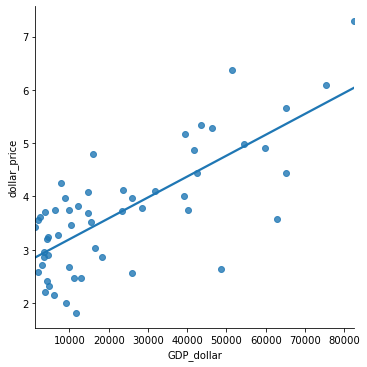

In [5]:
sns.lmplot(x='GDP_dollar', y='dollar_price', data=df, ci=None);

<IPython.core.display.Javascript object>

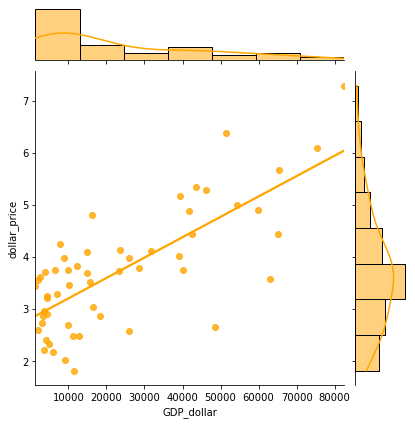

In [6]:
sns.jointplot(x='GDP_dollar', y='dollar_price', data=df, kind='reg', ci=None, color='orange');

### sklearn: Linear Regression 

In [7]:
import sklearn
from sklearn.linear_model import LinearRegression

In [8]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.23.2


In [9]:
model = LinearRegression()
model

LinearRegression()

In [10]:
df['GDP_dollar']

702     9890.314000
703    54348.227000
704     4813.670000
705    25997.583000
706     8751.381000
707    42378.606000
708    46271.717000
709    14772.111000
710    10286.580000
711     6423.179000
712    12243.842000
713    14853.016000
714    23538.518000
715    59770.324000
716     3043.640000
717    39378.286856
718     4354.336000
719     2550.666000
720    48626.576000
721    16469.607000
722     2097.782000
723     4196.670000
724    43603.013000
725    40255.936000
726     4425.687000
727    28499.788000
728    11193.016000
729     9862.440000
730     4458.192000
731    41666.635000
732     1920.291000
733    75294.428000
734    18198.309000
735     1348.676000
736     6957.864000
737     3511.935000
738    15600.657000
739    62918.848000
740    12887.060000
741    11601.418000
742    23266.486000
743    65233.880000
744     5977.954000
745    31846.217000
746     3852.484000
747    51404.434000
748    82483.925000
749    25873.367000
750     7806.961000
751     9150.862000


In [11]:
# model.fit(df['GDP_dollar'], df['dollar_price']) # error

In [12]:
df[['GDP_dollar']]

,GDP_dollar
702,9890.314000
703,54348.227000
704,4813.670000
705,25997.583000
706,8751.381000
707,42378.606000
708,46271.717000
709,14772.111000
710,10286.580000
711,6423.179000


In [13]:
model.fit(df[['GDP_dollar']], df['dollar_price']) 

LinearRegression()

In [14]:
X = df[['GDP_dollar']] # expect 2D array not Series (1D)
y = df.dollar_price

In [15]:
model.fit(X, y)

LinearRegression()

In [16]:
model.score(X, y) # R-squared

0.5552202728273847

In [17]:
model.intercept_

2.8063425659608017

In [18]:
model.coef_

array([3.91958618e-05])

$ y = \alpha + \beta x $

In [19]:
model.intercept_ + model.coef_ * 9000

array([3.15910532])

In [20]:
# model.predict(9000) # error

In [21]:
model.predict([[9000]]) # 2D array

array([3.15910532])

In [22]:
model.predict([[9000], 
               [40000]])

array([3.15910532, 4.37417704])

In [23]:
np.arange(5000, 50001, 2500)

<IPython.core.display.Javascript object>

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500,
       50000])

In [24]:
np.arange(5000, 50001, 2500).reshape(-1,1) # 2D array

<IPython.core.display.Javascript object>

array([[ 5000],
       [ 7500],
       [10000],
       [12500],
       [15000],
       [17500],
       [20000],
       [22500],
       [25000],
       [27500],
       [30000],
       [32500],
       [35000],
       [37500],
       [40000],
       [42500],
       [45000],
       [47500],
       [50000]])

In [25]:
model.predict(np.arange(5000, 50000, 2500).reshape(-1,1))

<IPython.core.display.Javascript object>

array([3.00232187, 3.10031153, 3.19830118, 3.29629084, 3.39428049,
       3.49227015, 3.5902598 , 3.68824946, 3.78623911, 3.88422877,
       3.98221842, 4.08020807, 4.17819773, 4.27618738, 4.37417704,
       4.47216669, 4.57015635, 4.668146  ])

In [26]:
np.linspace(5000, 50000, 20)

<IPython.core.display.Javascript object>

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

In [27]:
np.linspace(5000, 50000, 20).reshape(-1,1)

<IPython.core.display.Javascript object>

array([[ 5000.        ],
       [ 7368.42105263],
       [ 9736.84210526],
       [12105.26315789],
       [14473.68421053],
       [16842.10526316],
       [19210.52631579],
       [21578.94736842],
       [23947.36842105],
       [26315.78947368],
       [28684.21052632],
       [31052.63157895],
       [33421.05263158],
       [35789.47368421],
       [38157.89473684],
       [40526.31578947],
       [42894.73684211],
       [45263.15789474],
       [47631.57894737],
       [50000.        ]])

In [28]:
model.predict(np.linspace(5000, 50000, 20).reshape(-1,1))

<IPython.core.display.Javascript object>

array([3.00232187, 3.09515418, 3.18798648, 3.28081879, 3.37365109,
       3.4664834 , 3.5593157 , 3.652148  , 3.74498031, 3.83781261,
       3.93064492, 4.02347722, 4.11630953, 4.20914183, 4.30197413,
       4.39480644, 4.48763874, 4.58047105, 4.67330335, 4.76613566])

In [29]:
s = pd.Series(np.linspace(5000, 50000, 20))
s

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0      5000.000000
1      7368.421053
2      9736.842105
3     12105.263158
4     14473.684211
5     16842.105263
6     19210.526316
7     21578.947368
8     23947.368421
9     26315.789474
10    28684.210526
11    31052.631579
12    33421.052632
13    35789.473684
14    38157.894737
15    40526.315789
16    42894.736842
17    45263.157895
18    47631.578947
19    50000.000000
dtype: float64

In [30]:
model.predict(s.to_frame())

array([3.00232187, 3.09515418, 3.18798648, 3.28081879, 3.37365109,
       3.4664834 , 3.5593157 , 3.652148  , 3.74498031, 3.83781261,
       3.93064492, 4.02347722, 4.11630953, 4.20914183, 4.30197413,
       4.39480644, 4.48763874, 4.58047105, 4.67330335, 4.76613566])

In [31]:
dx = pd.DataFrame(np.linspace(5000, 50000, 20), columns=['gdp'])
dx

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,gdp
0,5000.000000
1,7368.421053
2,9736.842105
3,12105.263158
4,14473.684211
5,16842.105263
6,19210.526316
7,21578.947368
8,23947.368421
9,26315.789474


In [32]:
model.predict(dx)

array([3.00232187, 3.09515418, 3.18798648, 3.28081879, 3.37365109,
       3.4664834 , 3.5593157 , 3.652148  , 3.74498031, 3.83781261,
       3.93064492, 4.02347722, 4.11630953, 4.20914183, 4.30197413,
       4.39480644, 4.48763874, 4.58047105, 4.67330335, 4.76613566])

### Statsmodel: Simple Linear Regression 

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [34]:
# formula: response ~ predictor + predictor
model_a = smf.ols(formula = 'dollar_price ~ GDP_dollar', data=df).fit()

In [35]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     66.16
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           6.84e-11
Time:                        14:01:17   Log-Likelihood:                -63.151
No. Observations:                  55   AIC:                             130.3
Df Residuals:                      53   BIC:                             134.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8063      0.154     18.256      0.0

In [36]:
model_a.pvalues

Intercept     1.619054e-24
GDP_dollar    6.842971e-11
dtype: float64

In [37]:
model.intercept_ # sklearn

2.8063425659608017

In [38]:
model.coef_

array([3.91958618e-05])

In [39]:
print(f'{model.coef_[0]:.7f}')

0.0000392
